# **CIT Algorithm**


# **1- tester l'indépendance entre la variable d'objectif et chaque attribut :**
## **$H_0$: D(Y|X) = D(Y)** Il n'y a aucune association entre la variable Y et l'une des variables prédictives.

## $H_1$: Il existe une association

## Pour tester l'hypothèse globale, nous devons tester plusieurs sous-hypothèses, avec une hypothèse pour chaque variable prédictive. Pour accepter l'hypothèse globale, il faut accepter toutes les sous-hypothèses.

## Les sous-hypothèses
### $D(Y|X_1) = D(Y)$ , $D(Y|X_2) = D(Y)$ , .....$D(Y|X_j) = D(Y)$

# **Tests de permutation et statistiques de test**

## Pour chaque hypothèse, un test de permutation est effectué pour déterminer la signification de l'association entre la variable prédictive et la variable d'objectif. La test statistique spécifique utilisé dans le test de permutation dépend du type des variables analysées.

### Si **les deux variables sont numériques**, le coefficient de corrélation est utilisé comme statistique de test.
## **$r_{xy}=\frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum\limits_{i=1}^{n}(y_i-\bar{y})^2}}$**
### Si **une variable est numérique et l'autre catégorielle**, le test de chi2 est utilisé.

### Si **les deux variables sont catégorielles**,ONE WAY ANOVA est utilisé.



# **Monte carlo simulation pour approximer les valeur p du test de permutaion**

### Pour utiliser la simulation de Monte Carlo pour estimer la valeur p d'un test de permutation, nous échantillonnons d'abord au hasard un grand nombre de permutations (par exemple, 10 000 ou plus) dans l'espace de toutes les permutations possibles. Pour chaque permutation échantillonnée, nous calculons la statistique de test et enregistrons si la statistique de test est plus extrême que la statistique de test observée. Nous estimons ensuite la valeur de p comme la proportion de permutations échantillonnées pour lesquelles la statistique de test est plus extrême que la statistique de test observée.
### En échantillonnant aléatoirement les permutations au lieu d'énumérer toutes les permutations possibles, la simulation de Monte Carlo peut fournir des estimations précises des valeurs de p même pour de très grandes tailles d'échantillon.


# **2-** **Diviser les données et exécuter le test d'hypothèse et les critères d'arrêt pour chaque nœud:**
# Les valeurs p sont calculées pour tous les prédicteurs possibles et le prédicteur avec la valeur p la plus faible est sélectionné comme diviseur. Si plusieurs prédicteurs ont la même valeur p la plus faible, l'indice de Gini est utilisé pour déterminer la meilleure répartition entre eux.

# vous pouvez également vérifier les critères d'arrêt supplémentaires

## -les nœuds sont-ils purs c'est-à-dire est-ce que gini = 0 ?

## -Profondeur maximale : définissez une profondeur maximale pour l'arbre, au-delà de laquelle aucune autre division ne peut être effectuée.

## -Échantillons minimum par nœud feuille : définissez un nombre minimum d'échantillons requis pour un nœud feuille, au-delà duquel aucune autre division ne peut être effectuée.

# **3 - répéter :**
## Nous continuons ce processus jusqu'à ce que l'hypothèse globale soit acceptée ou qu'un critère d'arrêt soit satisfait.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import math
from graphviz import Source , Digraph ,Graph
import random
from PIL import Image
from IPython.display import display
from scipy.stats import chi2_contingency
import string

# **DATA (The data should be prepared such that all categorical variables are stored as objects, and all continuous variables are stored as floats. Additionally, the target variable should be placed in the last column of the dataset. These are the only requirements for the data format.)**

In [2]:
df = pd.read_csv(r"C:\Users\Timgad informatique\Desktop\treepipit.csv")
df=df.astype(float)
df["Y"] = df["counts"]
df=df.drop("counts",axis = 1)
df

,age,coverstorey,coverregen,meanregen,coniferous,deadtree,cbpiles,ivytree,fdist,Y
0,120.0,80.0,60.0,7.0,20.0,0.0,4.0,0.0,100.0,0.0
1,120.0,70.0,90.0,3.0,25.0,1.0,2.0,0.0,10.0,0.0
2,120.0,90.0,70.0,6.0,40.0,0.0,7.0,0.0,110.0,0.0
3,120.0,90.0,20.0,7.0,5.0,0.0,11.0,0.0,10.0,0.0
4,120.0,90.0,20.0,4.0,1.0,0.0,11.0,0.0,110.0,0.0
...,...,...,...,...,...,...,...,...,...,...
81,200.0,95.0,70.0,1.0,0.0,0.0,0.0,2.0,60.0,0.0
82,200.0,80.0,60.0,1.0,0.0,0.0,2.0,2.0,130.0,0.0
83,200.0,110.0,0.0,0.0,0.0,3.0,1.0,0.0,130.0,0.0
84,200.0,90.0,20.0,1.0,0.0,0.0,1.0,0.0,40.0,0.0


# **NODE CLASS**

In [3]:
class Node():
  def __init__(self,gini=None,pvalue=None,obs=None ,finalclass=None,right=None,left=None,feature=None,s=None):
    self.pvalue = pvalue
    self.gini = gini
    self.feature = feature
    self.finalclass = finalclass
    self.right = right
    self.left = left
    self.obs = obs
    self.s = s

# **CIT ALGO CLASS WITH ALL THE FUNCTIONS**

In [4]:
class CIT():
  ptype = None

  def __init__(self, ptype):
        self.ptype = ptype
        CIT.ptype = ptype

  def train_test_split(self,df, proportion): 
    proportion = round(proportion * len(df))
    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=proportion)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    test_df = test_df.reset_index(drop=True)
    train_df = train_df.reset_index(drop=True)
    return train_df, test_df



  def changetonumpy(self,train_df):
    data = train_df.values
    return data




  def check_purity(self,data):
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)
    if len(unique_classes) == 1:
        return True
    else:
        return False



  def classify_data(self,data):
    if cit.ptype == "classification":
        label_column = data[:, -1]
        unique_classes, count = np.unique(label_column, return_counts=True)
        index = count.argmax()
        classification = unique_classes[index]
        return classification
    elif cit.ptype == "regression":
        label_column = data[:, -1]
        classification=np.mean(label_column)
        return classification



  def all_splits(self,data):
    my_splits = {}
    for i in range(data.shape[1]-1):
      if str(df.dtypes[i]) == 'float64':
        l=[]
        for j in range(len(np.sort(data[:,i]))-1):
          l.append((np.sort(data[:,i])[j]+np.sort(data[:,i])[j+1])/2)
        my_splits[i]=l
      my_splits[i] = list(np.unique(data[:,i]))
    return my_splits



    
  def split_data(self,data, split_column , split_feature):
      if str(df.dtypes[split_column]) == 'float64':
            split_column_values = data[:, split_column]
            data_below = data[split_column_values < split_feature]
            data_above = data[split_column_values >=  split_feature]
      else:
        split_column_values = data[:, split_column]
        data_below = data[split_column_values == split_feature]
        data_above = data[split_column_values !=  split_feature]
      return data_below, data_above


  def correlation(self,y,x):
    return np.corrcoef(y,x)[0][1]




  def lowest(self,data,ss=0.05):
    pvalues = []
    n=0
    for n in range(len(df.columns)-1) :


      if (str(df.dtypes[df.columns[-1]]) == 'float64' ) and (str(df.dtypes[df.columns[n]]) == 'float64'):
        pval = []
        y=data[:,-1]
        x=data[:,n]
        cv = self.correlation(y,x)
        j=0
        while j < 10000 :
          sampled = np.random.choice(y, size=len(y), replace=True)
          pval.append(self.correlation(sampled,x))
          j = j + 1 
        p_value = np.mean(np.abs(np.array(pval)) >= np.abs(cv))
        pvalues.append(p_value)



      elif (str(df.dtypes[df.columns[-1]]) == 'object') and (str(df.dtypes[df.columns[n]]) == 'object'):
          pval = []
          Y = pd.factorize(df.iloc[:, -1])[0]
          X = pd.factorize(df.iloc[:, n])[0]
          unique_y = np.unique(Y)
          unique_x = np.unique(X)
          observed = np.histogram2d(Y, X, bins=(len(unique_y), len(unique_x)))[0]
          chi2M, p, dof, expected = chi2_contingency(observed)
          for i in range(1000):
              shuffled = np.random.choice(Y, size=len(Y), replace=True)
              permuted = np.histogram2d(shuffled, X, bins=(len(unique_y), len(unique_x)))[0]
              chi2, p, dof, expected = chi2_contingency(permuted)
              pval.append(chi2)
          pval = np.array(pval)
          p_value = np.mean(pval >= chi2M)
          pvalues.append(p_value)







      elif (str(df.dtypes[df.columns[-1]]) == 'object') and (str(df.dtypes[df.columns[n]]) == 'float64') :
        pval = []
        df_dummies = pd.get_dummies(df[df.columns[-1]])
        scores = df[df.columns[n]].values.astype(float)
        unique_categories = df[df.columns[-1]].unique()
        f_statm, p_valm = stats.f_oneway(*[scores[df[df.columns[-1]] == cat] for cat in unique_categories])
        j = 0
        while j < 1000 :
          sampled = np.random.choice(df[df.columns[-1]], size=len(df), replace=True)
          sampled_dummies = pd.get_dummies(sampled, prefix='', prefix_sep='')
          f_stat, p_val = stats.f_oneway(*[scores[sampled == cat] for cat in unique_categories])
          pval.append(p_val)
          j = j + 1
        p_value = np.mean(np.abs(np.array(pval)) <= np.abs(p_valm))
        pvalues.append(p_value)




      elif (str(df.dtypes[df.columns[-1]]) == 'float64') and (str(df.dtypes[df.columns[n]]) == 'object') :
          pval = []
          df_dummies = pd.get_dummies(df[df.columns[n]])
          scores = df[df.columns[-1]].values.astype(float)
          unique_categories = df[df.columns[n]].unique()
          f_statm, p_valm = stats.f_oneway(*[scores[df[df.columns[n]] == cat] for cat in unique_categories])
          j = 0
          while j < 1000 :
              sampled = np.random.choice(df[df.columns[n]], size=len(df), replace=True)
              sampled_dummies = pd.get_dummies(sampled, prefix='', prefix_sep='')
              f_stat, p_val = stats.f_oneway(*[scores[sampled == cat] for cat in unique_categories])
              pval.append(p_val)
              j = j + 1
          p_value = np.mean(np.abs(np.array(pval)) <= np.abs(p_valm))
          pvalues.append(p_value)


    pvalues=(1-((1-np.array(pvalues))**len(pvalues)))
    pvalues = list(pvalues)
    print(pvalues)
    return self.check_p_values(pvalues,ss=ss)



  def check_p_values(self,p_values,ss=0.05):
      significant_p_values = [p for p in p_values if p < ss]
      if len(significant_p_values) == 0:
          return "d"
      else:
          min_p_value = min(significant_p_values)
          num_min_p_values = significant_p_values.count(min_p_value)
          if num_min_p_values > 1:
              min_p_indices = [i for i, p in enumerate(p_values) if p == min_p_value and p < ss]
              return min_p_indices
          else:
              min_p_index = p_values.index(min_p_value)
              return (min_p_index)





  def gini(self,data,col,feature):

      if str(df.dtypes[col]) == 'float64':
        d1=data[data[:,col] < feature ]
        _,l1=np.unique(d1[:,-1],return_counts=True)
        gini_imp_leaf_1=1-np.sum(((l1)/np.sum(l1))**2)
        d2=data[data[:,col] >= feature ]
        _, l2 = np.unique(d2[:,-1],return_counts=True)
        gini_imp_leaf_2=1-np.sum(((l2)/np.sum(l2))**2)
        total_gini_impurity=(np.sum(l2)/(len(d2)+len(d1)))*gini_imp_leaf_2 + (np.sum(l1)/(len(d2)+len(d1)))*gini_imp_leaf_1
        return {"total_gini_impurity": total_gini_impurity}

      else:
        d1=data[data[:,col] == feature ]
        _,l1=np.unique(d1[:,-1],return_counts=True)
        gini_imp_leaf_1=1-np.sum(((l1)/np.sum(l1))**2)
        d2=data[data[:,col] != feature ]
        _, l2 = np.unique(d2[:,-1],return_counts=True)
        gini_imp_leaf_2=1-np.sum(((l2)/np.sum(l2))**2)
        total_gini_impurity=(np.sum(l2)/(len(d2)+len(d1)))*gini_imp_leaf_2 + (np.sum(l1)/(len(d2)+len(d1)))*gini_imp_leaf_1
        return {"total_gini_impurity": total_gini_impurity}


  def lowest_gini_base(self,data,my_splits):
        lowestnow = 10 
        for i in my_splits:
          for j in my_splits[i]:
                if self.gini(data,i,j)["total_gini_impurity"] < lowestnow:
                    lowestnow=self.gini(data,i,j)["total_gini_impurity"]
                    split_column=i
                    split_feature=j
                else:
                  continue
        return split_column , split_feature

  def lowest_gini(self,data,my_splits,ss=0.05):
        cond = self.lowest(data,ss=ss)
        if cond == "d":
          return 'd'
        elif isinstance(cond, list):
          lowestnow = 10 
          for i in my_splits:
            for j in my_splits[i]:
                  if self.gini(data,i,j)["total_gini_impurity"] < lowestnow:
                      lowestnow=self.gini(data,i,j)["total_gini_impurity"]
                      split_column=i
                      split_feature=j
                  else:
                    continue
          return split_column , split_feature
        elif isinstance(cond, int) :
          lowestnow = 10 
          for j in my_splits[cond]:
                if self.gini(data,cond,j)["total_gini_impurity"] < lowestnow:
                    lowestnow=self.gini(data,cond,j)["total_gini_impurity"]
                    split_column=cond
                    split_feature=j
                else:
                  continue
          return split_column , split_feature





  def RSS(self,data,col,feature):
        datab , dataa = self.split_data(data, col , feature)
        meandatab=self.classify_data(datab)
        meandataa=self.classify_data(dataa)
        RSS1 = np.sum((datab[:, -1]-meandatab)**2)
        RSS2 = np.sum((dataa[:, -1]-meandataa)**2)
        RSS = RSS1 + RSS2
        return RSS




  def lowest_RSS_base(self,data,my_splits):
        lowestnow = 10000000000000000000000
        for i in my_splits:
          for j in my_splits[i]:
                if self.RSS(data,i,j) < lowestnow:
                    lowestnow=self.RSS(data,i,j)
                    split_column=i
                    split_feature=j
                else:
                  continue
        return split_column , split_feature

  def lowest_RSS(self,data,my_splits,ss=0.05):
        cond = self.lowest(data,ss=ss)
        if cond == "d":
          return 'd'
        elif isinstance(cond, list):
          lowestnow = 10000000000000000 
          for i in my_splits:
            for j in my_splits[i]:
                  if self.RSS(data,i,j) < lowestnow:
                      lowestnow=self.RSS(data,i,j)
                      split_column=i
                      split_feature=j
                  else:
                    continue
          return split_column , split_feature
        elif isinstance(cond, int) :
          lowestnow = 100000000000000000
          for j in my_splits[cond]:
                if self.RSS(data,cond,j)< lowestnow:
                    lowestnow=self.RSS(data,cond,j)
                    split_column=cond
                    split_feature=j
                else:
                  continue
          return split_column , split_feature




  def decision_tree_algorithm(self,data, counter=0, min_samples=10, max_depth=3,ss=0.05):
    if cit.ptype == "classification":
      M = self.lowest_gini(data,self.all_splits(data),ss=ss)

      if M == 'd'or (len(data) < 15) or (counter == max_depth)or(self.check_purity(data)):
          split_column,split_feature=self.lowest_gini_base(data,self.all_splits(data))
          classification = self.classify_data(data)
          node=Node(finalclass=classification,obs='Num of Data points'+": "+str(len(data)),gini='Gini impurity'+": "+str(self.gini(data,split_column,split_feature)["total_gini_impurity"]))
          return node

      else:    
          counter += 1
          split_column,split_feature = M
          data_below, data_above = self.split_data(data, split_column,split_feature)

          if str(df.dtypes[split_column]) == 'float64':
            node=Node(gini='Gini impurity'+": "+str(self.gini(data,split_column,split_feature)["total_gini_impurity"]),feature=str(df.columns[split_column])+" < "+str(split_feature),s=ss)
          else:
            node=Node(gini='Gini impurity'+": "+str(self.gini(data,split_column,split_feature)["total_gini_impurity"]),feature=str(df.columns[split_column])+" = "+str(split_feature),s=ss)

          node.left = self.decision_tree_algorithm(data_below,counter,max_depth=max_depth)
          node.right = self.decision_tree_algorithm(data_above, counter,max_depth=max_depth)

          return node
    elif cit.ptype == "regression":
      M = self.lowest_RSS(data,self.all_splits(data),ss=ss)
      if M == 'd'or (len(data) < 15) or (counter == max_depth)or(self.check_purity(data)):
          split_column,split_feature=self.lowest_RSS_base(data,self.all_splits(data))
          classification = self.classify_data(data)
          node=Node(finalclass=classification,gini='RSS'+": "+str(self.RSS(data,split_column,split_feature)))
          return node
      else:    
          counter += 1
          split_column,split_feature = self.lowest_RSS(data,self.all_splits(data))
          data_below, data_above = self.split_data(data, split_column,split_feature)

          if str(df.dtypes[split_column]) == 'float64':
            node=Node(gini='RSS'+": "+str(self.RSS(data,split_column,split_feature)),feature=str(df.columns[split_column])+" < "+str(split_feature))
          else:
            node=Node(gini='RSS'+": "+str(self.RSS(data,split_column,split_feature)),feature=str(df.columns[split_column])+" = "+str(split_feature))

          node.left = self.decision_tree_algorithm(data_below, counter,max_depth=max_depth)
          node.right = self.decision_tree_algorithm(data_above, counter,max_depth=max_depth)

          return node



  def build_cond_tree(self,df,max_depth=3,s=0.05):
    data = self.changetonumpy(df)
    tree=self.decision_tree_algorithm(data, counter=0, min_samples=20, max_depth=max_depth,ss=s)
    return tree


  def build_graph(self, node, dot=None):          
    if cit.ptype=="classification":
      if dot is None:
          dot = Digraph()

      if node.feature is None:

            dot.node(str(id(node)), label="Class: "+str(node.finalclass)+"\n"+str(node.gini)+"\n"+str(node.obs), 
                    style="filled", fillcolor="mistyrose", fontcolor="black")

      else:
          dot.node(str(id(node)), label=str(node.feature)+"\n"+str(node.gini)+"\n"+"p < "+str(node.s), 
                  style="filled", fillcolor="white", fontcolor="black")
          dot = self.build_graph(node.left, dot=dot)
          dot = self.build_graph(node.right, dot=dot)
          dot.edge(str(id(node)), str(id(node.left)), label='True', 
                  fontcolor="black", color="black")
          dot.edge(str(id(node)), str(id(node.right)), label='False', 
                  fontcolor="black", color="black")
      
      dot.graph_attr.update(bgcolor='white', fontcolor='white')
      dot.node_attr.update(fontname='Helvetica', fontsize='15', shape='box')
      dot.edge_attr.update(fontname='Helvetica', fontsize='12')
    
      return dot
    else:
      if dot is None:
          dot = Digraph()

      if node.feature is None:

            dot.node(str(id(node)), label="prediciton: "+str(node.finalclass)+"\n"+str(node.gini), 
                    style="filled", fillcolor="mistyrose", fontcolor="black")

      else:
          dot.node(str(id(node)), label=str(node.feature)+"\n"+str(node.gini)+"\n"+"p < "+str(node.s), 
                  style="filled", fillcolor="white", fontcolor="black")
          dot = self.build_graph(node.left, dot=dot)
          dot = self.build_graph(node.right, dot=dot)
          dot.edge(str(id(node)), str(id(node.left)), label='True', 
                  fontcolor="black", color="black")
          dot.edge(str(id(node)), str(id(node.right)), label='False', 
                  fontcolor="black", color="black")
      
      dot.graph_attr.update(bgcolor='white', fontcolor='white')
      dot.node_attr.update(fontname='Helvetica', fontsize='15', shape='box')
      dot.edge_attr.update(fontname='Helvetica', fontsize='12')
    
      return dot

  def show_tree(self,tree):
    dot = self.build_graph(node=tree)
    return Source(dot.source)


  
  def classex(self,t, ex):
      if t.finalclass is not None:
          return t.finalclass
      else:
        L = t.feature.split(sep=" ")
        if str(df.dtypes[L[0]]) != 'float64':    
            if (ex[L[0]] == L[2]):
                return self.classex(t.left, ex)
            else:
                return self.classex(t.right, ex)
        else:
            if (float(ex[L[0]]) < float(L[2])):
                return self.classex(t.left, ex)
            else:
                return self.classex(t.right, ex)





  def predict(self,test_df,t):
    if cit.ptype=="classification":
      test_dfp=test_df.copy()
      correctpred = 0
      test_dfp["prediction"] = None
      for i in range(len(test_dfp)):
        test_dfp["prediction"][i] = self.classex(t, test_dfp.iloc[i])
        if (self.classex(t,test_dfp.iloc[i]) == test_dfp.values[i,-2]):
          correctpred = correctpred + 1
          
        else:
          continue
      acc = correctpred / len(test_dfp)
      return acc , test_dfp
    else:
      test_dfp=test_df.copy()
      test_dfp["prediction"] = None
      for i in range(len(test_dfp)):
        test_dfp["prediction"][i]=self.classex(t,test_dfp.iloc[i])
      mean=np.mean((test_dfp.values)[:,-2])
      TSS=np.sum(     (  (test_dfp.values)[:,-2]-mean   )      **2   )
      RSS = np.sum(   (    (test_dfp.values)[:,-2] - (test_dfp.values)[:,-1]    )**2   )
      Rsqrd=1-(RSS/TSS)
      
      return Rsqrd,test_dfp


# **Fitting the data** ''takes around 40 secs''.

In [7]:
random.seed(12)
cit = CIT(ptype="classification")
train , test = cit.train_test_split(df,proportion=0.8)
tree = cit.build_cond_tree(train,max_depth=5)
acc , pred = cit.predict(test,tree)

C:\Users\Timgad informatique\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Timgad informatique\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


[0.7120840110962391, 0.02755653084363363, 0.993465725736403, 0.9999999700430477, 0.9988657787367162, 0.9999965278597632, 0.9747729415167762, 0.9791442550029856, 0.0922796295556948]
[0.8303458572074791, 0.12478179002210665, 0.8706836748649315, 0.8087595759167099, 0.7141603194044241, 0.9997799280086869, 0.9913633978518633, 0.0, 0.9984362181658225]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\Timgad informatique\AppData\Local\Temp\ipykernel_5288\2319844527.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dfp["prediction"][i] = self.classex(t, test_dfp.iloc[i])


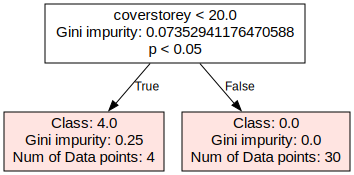

In [8]:
#plot the tree
cit.show_tree(tree)

In [9]:
#Accuracy
print("The accuracy is",acc)

The accuracy is 0.8076923076923077


In [10]:
#Dataframe with the predictions
pred

,age,coverstorey,coverregen,meanregen,coniferous,deadtree,cbpiles,ivytree,fdist,Y,prediction
0,200.0,100.0,0.0,0.0,25.0,0.0,2.0,0.0,125.0,0.0,0.0
1,230.0,65.0,30.0,1.5,3.0,1.0,3.0,4.0,90.0,0.0,0.0
2,160.0,30.0,90.0,9.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0
3,160.0,20.0,40.0,2.0,30.0,0.0,6.0,0.0,200.0,0.0,0.0
4,200.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,0.0,0.0
5,160.0,20.0,20.0,2.0,30.0,0.0,6.0,0.0,200.0,0.0,0.0
6,120.0,70.0,90.0,3.0,25.0,1.0,2.0,0.0,10.0,0.0,0.0
7,160.0,20.0,30.0,1.0,30.0,0.0,10.0,0.0,300.0,0.0,0.0
8,200.0,100.0,0.0,0.0,0.0,0.0,2.0,0.0,25.0,0.0,0.0
9,230.0,75.0,5.0,2.0,0.0,0.0,6.0,0.0,180.0,0.0,0.0


# **The results from the original paper using the official R package  are nearly identical**
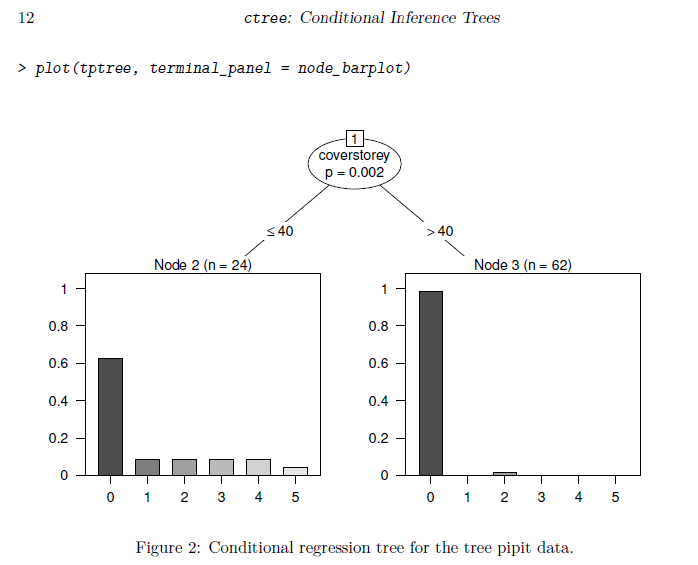

# **Comparing results from a regular tree fit with sklearn and the cit algo**

Accuracy: 0.8888888888888888


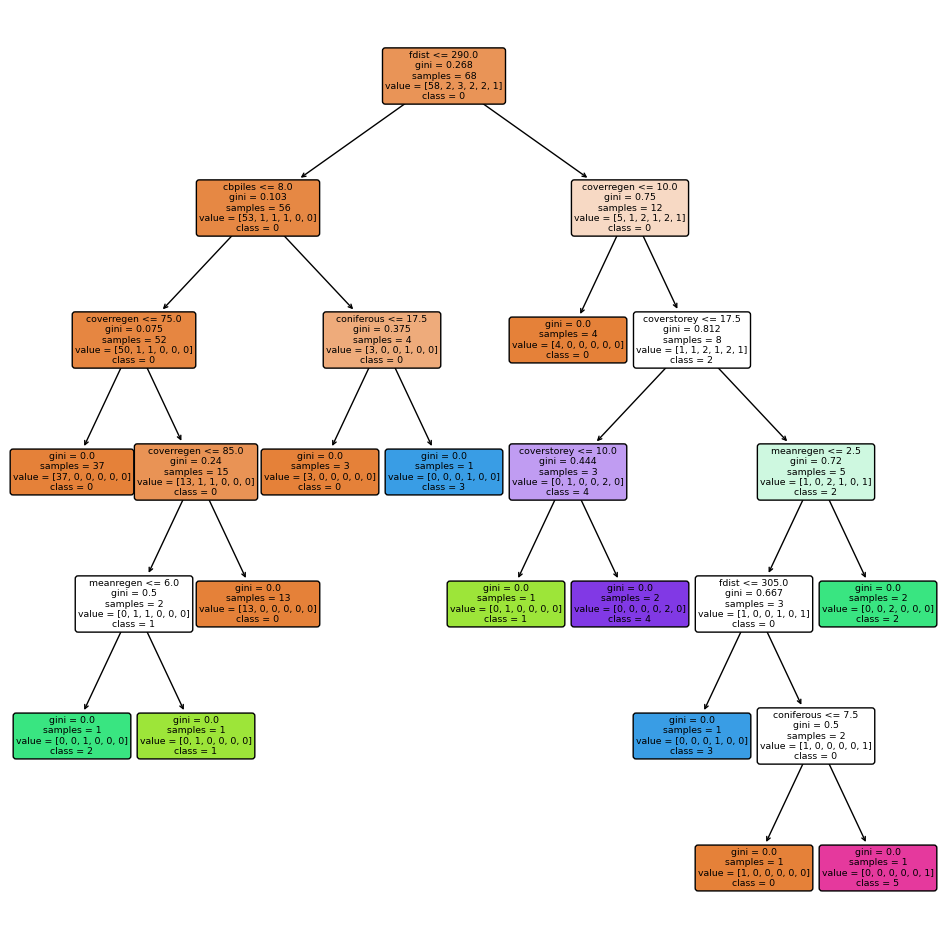

In [11]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn import metrics
feature_cols = ['age', 'coverstorey', 'coverregen', 'meanregen', 'coniferous',
       'deadtree', 'cbpiles', 'ivytree', 'fdist']
X = df[feature_cols]
y = df.Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
tree_rules = export_text(clf, feature_names=feature_cols)
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(clf, filled=True, feature_names=feature_cols, class_names=["0", "1", "2", "3", "4","5"], rounded=True, ax=ax)
plt.show()

# **The normal descion tree overfits the data and the tree has much more depth than in the cit algo also it splits and uses predictors that do not have a relation with the goal variable**